# Titanic - Machine Learning from Disaster
The objective of the Titanic - Machine Learning from Disaster project is to use machine learning techniques to analyze data from the Titanic disaster and build a model that predicts the survival of passengers based on factors such as:

- Gender (Sex)
- Age (Age)
- Ticket class (Passenger class - Pclass)
- Fare price (Fare)
- Number of family members aboard (SibSp, Parch)
- Port of embarkation (Embarked)
  
### Specific Objectives:
1. Exploratory Data Analysis (EDA)

- Identify features that impact survival rates.
- Handle missing data.
- Visualize data to uncover patterns.
2. Data Preprocessing

- Handle missing values.
- Encode categorical variables.
- Normalize and extract relevant features.
3. Building Machine Learning Models

- Use algorithms like Logistic Regression, Decision Tree, Random Forest, XGBoost, or Neural Networks to predict survival.
- Evaluate model performance using accuracy, F1-score, AUC-ROC.
4. Model Optimization

- Tune hyperparameters to improve accuracy.
- Compare the performance of different models.
5. Model Deployment

- Generate predictions in CSV format for submission to Kaggle.

In [318]:
# Import Lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [319]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [320]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Notes:
* `SibSp`: # of siblings / spouses abroad the Titanic
* `Parch`: # of parent / children abroad the Titanic
* `Ticket`: Ticket Number
* `Cabin`: Cabin Number 

In [322]:
# Preview data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [323]:
train_df.set_index(train_df.PassengerId,inplace=True)

In [324]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [325]:
train_df.drop('PassengerId',axis = 1, inplace = True)

In [326]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [327]:
test_df = pd.read_csv('test.csv', index_col="PassengerId")

In [328]:
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## 1. Feature Classification: Categorical vs Numberical
* This helps us select the approriate plots for visualization

#### Which features are categorical?
* Categorical Features: `nominal`, `ordinal`, `ratio`, `interval`
* To classify the samples into sets of similar samples

#### Which features are numerical?
* Numerical features: `discrete`, `continuous`, or `timeseries`
* These values change from sample to sample

In [330]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [331]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


* Categorical: Survived, Sex, Embarked, Pclass (ordinal), SibSp, Parch
* Numerical: (continuous) Age, Fare, (discrete)
* Mix types of data: Ticket, Cabin
* Contain Error/Typo: Name
* Blank or Null: Cabin > Age > Embarked
* Various Data Type: String, Int, Float

In [333]:
train_df["Survived"] = train_df["Survived"].astype("category")

In [334]:
train_df["Survived"].info()

<class 'pandas.core.series.Series'>
Index: 891 entries, 1 to 891
Series name: Survived
Non-Null Count  Dtype   
--------------  -----   
891 non-null    category
dtypes: category(1)
memory usage: 8.0 KB


In [335]:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")
convert_cat(train_df,features)
convert_cat(test_df,features)

In [336]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


### Distribution of Numerical feature values across the samples

In [338]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


### Distribution of Categorical features

train_df.describe(include=['category'])

## 2. Exploratory Data Analysis (EDA)

### Correlation categorical features
* Categorical: Survived, Sex Embarked, Pclass (ordinal), SibSp, Parch
### Target Variable: Survived

In [342]:
train_df["Survived"].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [343]:
train_df["Survived"].value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


Only 38% survived the disater. Sp the training data suffers from data imbalance but it not severe which is why not consider techniques like sampling to tackle the imbalance

`Sex`

In [345]:
train_df['Sex'].value_counts(normalize=True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


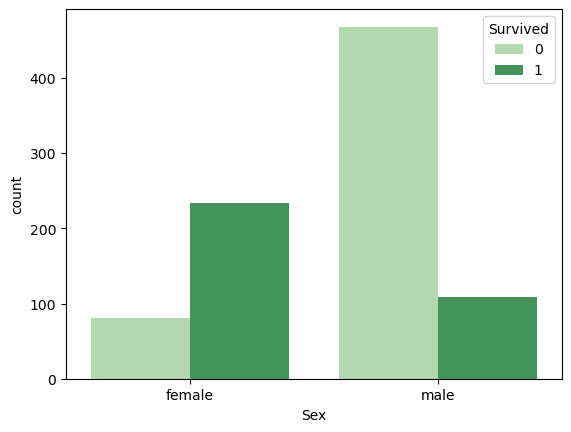

In [346]:
sns.countplot(data=train_df,x='Sex',hue='Survived', palette='Greens');

* Remaining Categorical Feature Columns

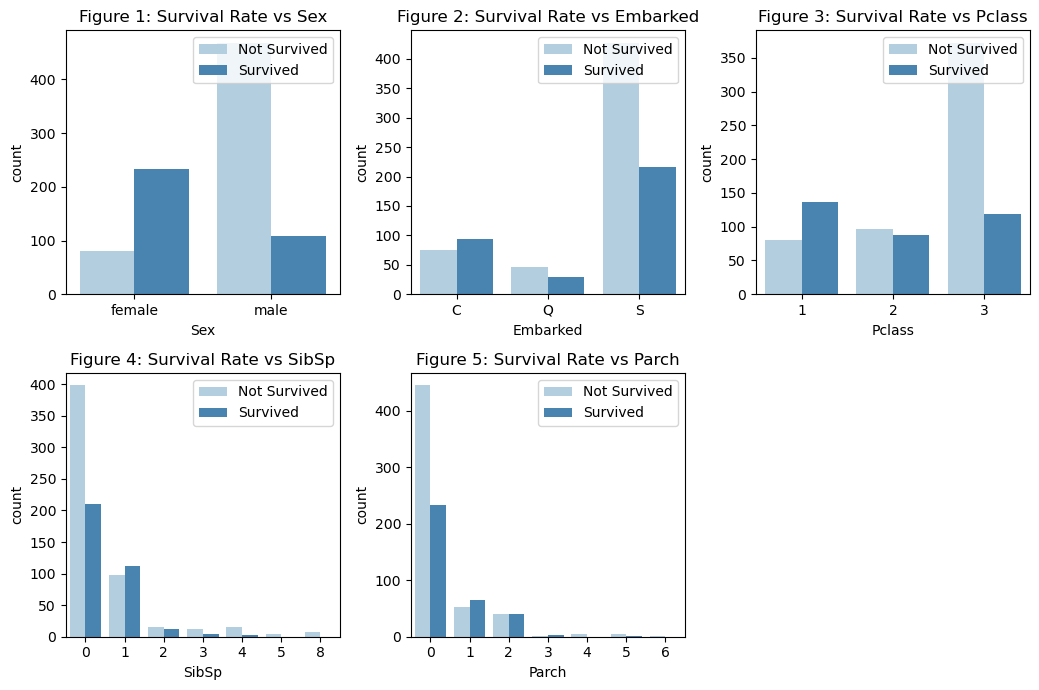

In [348]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=train_df, x=cols[i], hue="Survived", palette='Blues',ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: Survival Rate vs {cols[i]}")
            ax_i.legend(title = '', loc='upper right', labels=['Not Survived', 'Survived'])
ax.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()

#### Observation:

* Survival Rate:
  * Fig 1: Female survival rate>male
  * Fig 2: Most People embarked on Southampton, and also had the highest people not survival
  * Fig 3: 1st class higher survival rate
  * Fig 4: People going with 0 SibSp are mostly not survived, the number of passenger with 1-2 family members has a better chance of survival
  * Fig 5: People going with 0 Parch are mostly not survived 

### EDA for Numerical Features
* Numerical Features: (continuous) `Age`, `Fare`

#### Age

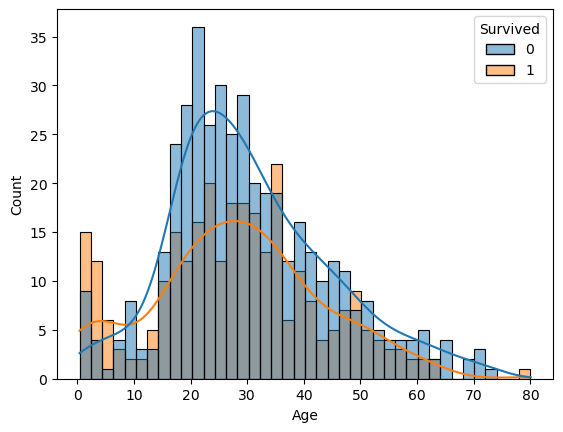

In [351]:
sns.histplot(data=train_df, x = 'Age', hue = 'Survived', bins = 40, kde = True);

* Majority passengers were from 18-40 ages
* Children had more chance to survive than other ages

#### Fare

In [353]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

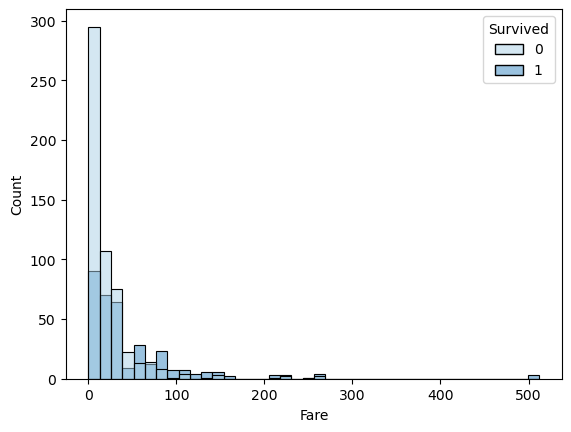

In [354]:
sns.histplot(data=train_df, x = 'Fare',hue='Survived', bins = 40, palette='Blues');

<Axes: xlabel='Fare', ylabel='count'>

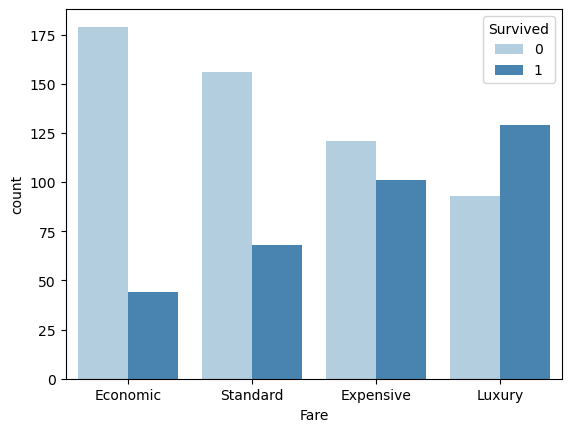

In [355]:
# To name for 0-25% quartile, 25-50, 50-75,75-100
fare_categories = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartile_data = pd.qcut(train_df['Fare'], 4, labels=fare_categories )
sns.countplot(x=quartile_data, hue = train_df['Survived'], palette='Blues')

* Distribution of Fare
  * Fare does not follow a normal distribution and has a huge spike at the price range `[0-100$]` 
  * The distribution is skewed to the left with 75% of the fare paid under `$31` and a max paid of `$512`
  * Passenger with Luxury & Expensive Fare will have more chance to survive

### Feature Engineering & Data Wrangling

#### Name
* Regular Expression

In [358]:
train_df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [359]:
import re #regular expression
def extract_title(name):
    p = re.compile(r", ([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()
train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))
train_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [360]:
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))
test_df['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [361]:
def group_title(title):
    if title in ['Mr','Mrs', 'Miss', 'Master']:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Others"
train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

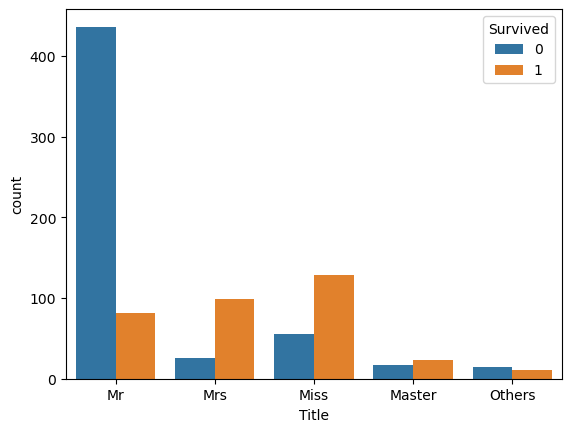

In [362]:
sns.countplot(data=train_df, x = 'Title', hue='Survived');

# Family
* `SibSp` ,`Parch`

In [364]:
train_df['Family_Size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1

In [365]:
train_df['Family_Cat'] = pd.cut(train_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo', 'Small', 'Medium', 'Large']) # (0,1], (1,4] , (4,6], (6,20]

In [366]:
test_df['Family_Size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

In [367]:
test_df['Family_Cat'] = pd.cut(test_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo', 'Small', 'Medium', 'Large']) # (0,1], (1,4] , (4,6], (6,20]

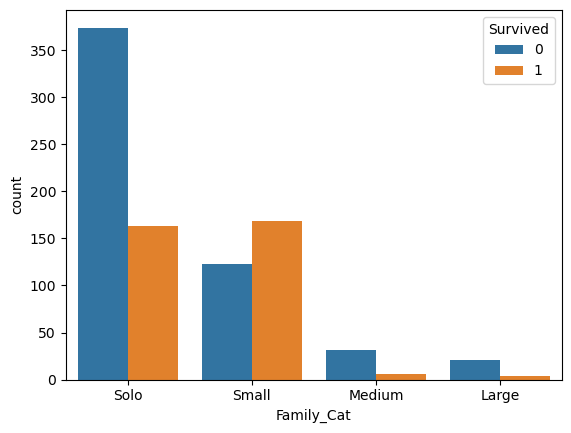

In [368]:
sns.countplot(data=train_df, x = 'Family_Cat', hue = 'Survived');

# Data Wrangling

In [370]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [371]:
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"Col {col} has {missing_count*100/n_rows:.2f}% missing values.")
display_missing(train_df,feature_cols)
display_missing(test_df,feature_cols)

Col Age has 19.87% missing values.
Col Embarked has 0.22% missing values.
Col Age has 20.57% missing values.
Col Fare has 0.24% missing values.


### Filling missing values

#### Age
- Filling missing values with `median` of whole dataset

In [373]:
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass'], observed=True)['Age'].median()


In [374]:
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [375]:
# Filling the missing values in Age with the medians of Sex and Pclass groups

# Calculate the median Age for each group
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass'], observed=False)['Age'].transform('median')
age_by_sex_pclass_test = test_df.groupby(['Sex', 'Pclass'], observed=False)['Age'].transform('median')

# Fill missing values in Age with the computed medians
train_df['Age'] = train_df['Age'].fillna(age_by_sex_pclass)
test_df['Age'] = test_df['Age'].fillna(age_by_sex_pclass_test)

In [376]:
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"Col {col} has {missing_count*100/n_rows:.2f}% missing values.")
display_missing(train_df,feature_cols)
display_missing(test_df,feature_cols)

Col Embarked has 0.22% missing values.
Col Fare has 0.24% missing values.


In [377]:
x = train_df[feature_cols]
y = train_df['Survived']

In [378]:
x_test = test_df[feature_cols]

In [379]:
# preprocess pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])    

In [380]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [381]:
preprocessor.fit(x)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [382]:
x = preprocessor.transform(x) # x -> x_train, x_val

In [383]:
x_test = preprocessor.transform(x_test)

# Model Training

In [385]:
from sklearn.model_selection import train_test_split

In [386]:
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2)

In [387]:
x_train.shape, x_val.shape

((712, 19), (179, 19))

In [388]:
x_test.shape

(418, 19)

In [389]:
# Binary classification

from sklearn.preprocessing import PolynomialFeatures
# sklearn model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix


In [390]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [391]:
log_reg.score(x_val,y_val)

0.8044692737430168

In [392]:
y_pred = log_reg.predict(x_val)

In [393]:
precision_score(y_val,y_pred),recall_score(y_val,y_pred)

(0.7692307692307693, 0.7142857142857143)

In [394]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       109
           1       0.77      0.71      0.74        70

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



- y = ax1 + bx2 + bias -> y = a*x1^2 + b*x2^2 + c*x1*x2 + bias               

In [396]:
poly = PolynomialFeatures(degree=2)
poly_feature_x_train = poly.fit_transform(x_train)
poly_feature_x_val = poly.transform(x_val)

In [397]:
poly_log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
poly_log_reg.fit(poly_feature_x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [398]:
poly_log_reg.score(poly_feature_x_val,y_val)

0.7877094972067039

In [399]:
# Decision Tree
decision_tree = DecisionTreeClassifier(criterion= 'entropy', max_depth=8, random_state=2022)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2022)

In [400]:
decision_tree.score(x_val,y_val)

0.7988826815642458

# Cross-validation

In [402]:
from sklearn.model_selection import cross_val_score

In [403]:
log_reg_cv = LogisticRegression(solver='liblinear', max_iter=1000)
dt_cv = DecisionTreeClassifier(criterion= 'entropy', max_depth=8, random_state=2022)

lr_scrores = cross_val_score(log_reg_cv, x,y,scoring='accuracy', cv=5)

In [404]:
lr_scrores

array([0.83240223, 0.8258427 , 0.79775281, 0.81460674, 0.85955056])

In [405]:
lr_scrores.mean(), lr_scrores.std()

(0.826031008725127, 0.020466357172416235)

In [406]:
dt_scores = cross_val_score(dt_cv, x,y,scoring='accuracy', cv=5)

In [407]:
dt_scores.mean(), dt_scores.std()

(0.8069801016885318, 0.014586754299604428)

# Baseline Model Comparison

In [409]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

models = [
    LinearSVC(max_iter=12000,random_state=2023),
    SVC(random_state=2023),
    KNeighborsClassifier(metric='minkowski', p=2),
    LogisticRegression(solver='liblinear', max_iter=1000),
    DecisionTreeClassifier(random_state=2023),
    RandomForestClassifier(random_state=2023),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=2023)
] 

In [493]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(models, x, y, metrics, cv=5, plot_results=False):
    #define k-fold:
    kfold = StratifiedKFold(cv,shuffle=True, random_state=2023)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model,x,y,scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name,fold_idx,score))
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score'])

    if plot_results:
        sns.boxplot(x='model_name', y='accuracy_score', data=cv_df, color='lightblue', showmeans=True)
        plt.title('Boxplot of Base-Line Model Accuracy using 5-fold cross-validation')
        plt.xticks(rotation=45)
        plt.show()
    # Summary result
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()
    baseline_results = pd.concat([mean, std], axis=1, ignore_index=True)
    baseline_results.columns = ['Mean', 'Standard Devidation']

    # sort by accuracy
    baseline_results.sort_values(by=['Mean'],ascending=False,inplace=True)
    return baseline_results
generate_baseline_results(models, x,y, metrics='accuracy', cv=5,plot_results=False)

C:\Users\aassd\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\aassd\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\aassd\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\aassd\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\aas

,Mean,Standard Devidation
model_name,,
SVC,0.836143,0.031097
XGBClassifier,0.831624,0.015685
LogisticRegression,0.827167,0.028974
LinearSVC,0.826044,0.037442
AdaBoostClassifier,0.818160,0.030812
RandomForestClassifier,0.812529,0.025614
KNeighborsClassifier,0.810301,0.013789
ExtraTreesClassifier,0.802442,0.019918
DecisionTreeClassifier,0.794608,0.016252
